In [ ]:
# Calculates return period rainfall after fitting the provided annual max data into different pdf's

In [5]:
import numpy as np
import pandas as pd
from scipy import stats

def fit_best_distribution(data):
    distributions = ['gamma', 'pearson3', 'lognorm', 'gumbel_r', 'norm']
    best_distribution = None
    best_params = None
    best_ks_statistic = np.inf
    
    for distribution in distributions:
        # Fit the distribution to the data
        params = getattr(stats, distribution).fit(data)
        
        # Perform K-S test
        ks_statistic, p_value = stats.kstest(data, distribution, args=params)

        print(ks_statistic, p_value,distribution)
        
        # Update best distribution if current one has better K-S statistic
        if ks_statistic < best_ks_statistic:
            best_distribution = distribution
            best_params = params
            best_ks_statistic = ks_statistic
    
    return best_distribution, best_params, best_ks_statistic
def rainfall(dist,params,p):
    if dist == 'gamma' :
         return stats.gamma.ppf(p,*params)
    elif dist == 'pearson3' :
         return stats.pearson3.ppf(p,*params)
    elif dist == 'lognorm' :
         return stats.lognorm.ppf(p,*params)
    elif dist == 'gumbel_r' :
         return stats.gumbel_r.ppf(p,*params)
    elif dist == 'norm' :
         return stats.norm.ppf(p,*params)
    
def main():
    # Load rainfall data from CSV file
    data = pd.read_excel(r'D:\Git\Projects\Git files\Rainfall-analysis\Annual Max Rainfall.xlsx', usecols=[0]).values.flatten()
    
    # Fit best distribution
    best_distribution, best_params, best_ks_statistic = fit_best_distribution(data)

    # Enter Retun period
    rp =100
    p = 1-(1/rp)

    #return period rainfall
    rf=rainfall(best_distribution, best_params,p)
    
    # Print results
    print("Best Fitted Distribution:", best_distribution)
    print("Parameters of Best Fitted Distribution:", best_params)
    print("K-S Test Statistic Value:", best_ks_statistic)
    print("Rainfall of ",rp,"is",rainfall(best_distribution, best_params,p))

if __name__ == "__main__":
    main()


0.05969763453947885 0.7757900757330324 gamma
0.059697918327834554 0.7757852121695565 pearson3
0.05509159859950244 0.8501526103699788 lognorm
0.050454983546573795 0.9122129922316802 gumbel_r
0.12250745440428168 0.05470403801128321 norm
Best Fitted Distribution: gumbel_r
Parameters of Best Fitted Distribution: (52.048135720884936, 19.237754039377705)
K-S Test Statistic Value: 0.050454983546573795
Rainfall of  100 is 140.5446750900463


In [ ]:
# generates incremental rainfall based CWC Conversion factors

In [6]:
import pandas as pd

def generate_product_array(excel_file, sub_zone, rainfall_value):
    # Read the Excel file
    df = pd.read_excel(excel_file, sheet_name='Incremental rainfall factor')

    # Validate that the sub zone is in the column headers
    if sub_zone not in df.columns:
        raise ValueError(f"Sub zone '{sub_zone}' not found in the columns: {df.columns.tolist()}")

    # Extract the sub zone values (excluding the first column which is 'Hour')
    sub_zone_values = df[sub_zone].values

    # Calculate the product of the rainfall value and sub zone values
    product_array = rainfall_value * sub_zone_values

    return product_array

# Example usage
excel_file = r'D:\00 Common Data\Rainfall Conversion Factor CWC.xlsx'
sub_zone = '1a'  # specify the sub zone you're interested in
rainfall_value = rf  # example rainfall value

product_array = generate_product_array(excel_file, sub_zone, rainfall_value)
print(product_array)


NameError: name 'rf' is not defined

In [ ]:
# generate Rainfall hyetograph using the values generated after using IDF

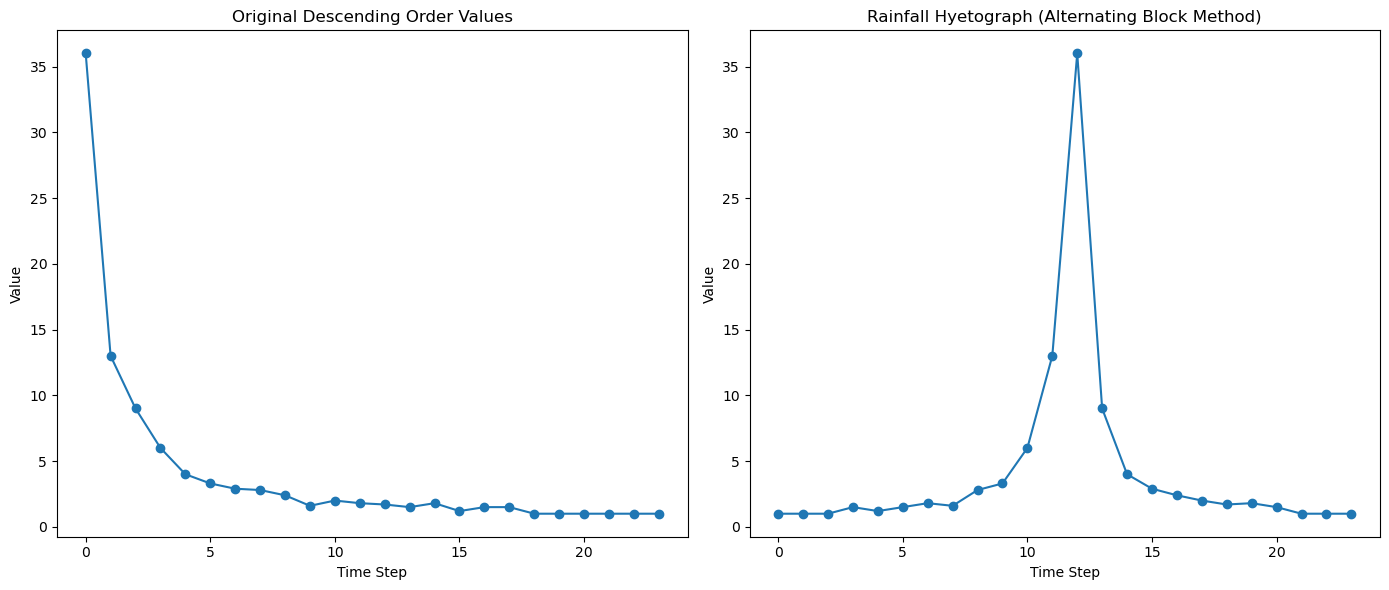

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate a descending order list of 24 values
values = product_array

# Step 2: Distribute values using the alternating block method
def alternating_block_method(values):
    n = len(values)
    hyetograph = [0] * n
    
    # Center index
    center = n // 2
    
    # Split the values into alternating blocks
    left, right = center - 1, center + 1
    hyetograph[center] = values[0]
    
    for i in range(1, n):
        if i % 2 != 0:  # Alternate placing on left and right
            hyetograph[left] = values[i]
            left -= 1
        else:
            hyetograph[right] = values[i]
            right += 1
    
    return hyetograph

# Rearrange the values using the alternating block method
hyetograph = alternating_block_method(values)

# Step 3: Plot the original and rearranged lists
plt.figure(figsize=(14, 6))

# Original descending values plot
plt.subplot(1, 2, 1)
plt.plot(values, marker='o')
plt.title('Original Descending Order Values')
plt.xlabel('Time Step')
plt.ylabel('Value')

# Rearranged hyetograph plot
plt.subplot(1, 2, 2)
plt.plot(hyetograph, marker='o')
plt.title('Rainfall Hyetograph (Alternating Block Method)')
plt.xlabel('Time Step')
plt.ylabel('Value')

plt.tight_layout()
plt.show()


0.05969763453947885 0.7757900757330324 gamma
0.059697918327834554 0.7757852121695565 pearson3
0.05509159859950244 0.8501526103699788 lognorm
0.050454983546573795 0.9122129922316802 gumbel_r
0.12250745440428168 0.05470403801128321 norm
Best Fitted Distribution: gumbel_r
Parameters of Best Fitted Distribution: (52.048135720884936, 19.237754039377705)
K-S Test Statistic Value: 0.050454983546573795
Rainfall of  50 is 127.11267189899402
Incremental rainfall array [44.48943516 13.60105589  9.27922505  7.2454223   5.84718291  4.70316886
  3.1778168   3.1778168   2.54225344  2.79647878  2.28802809  2.54225344
  2.28802809  1.90669008  2.16091542  1.65246473  2.54225344  2.16091542
  2.03380275  2.16091542  2.16091542  1.90669008  2.28802809  2.16091542]
Rainfall Hyetograph [44.48943516 13.60105589  9.27922505  7.2454223   5.84718291  4.70316886
  3.1778168   3.1778168   2.54225344  2.79647878  2.28802809  2.54225344
  2.28802809  1.90669008  2.16091542  1.65246473  2.54225344  2.16091542
  2.0

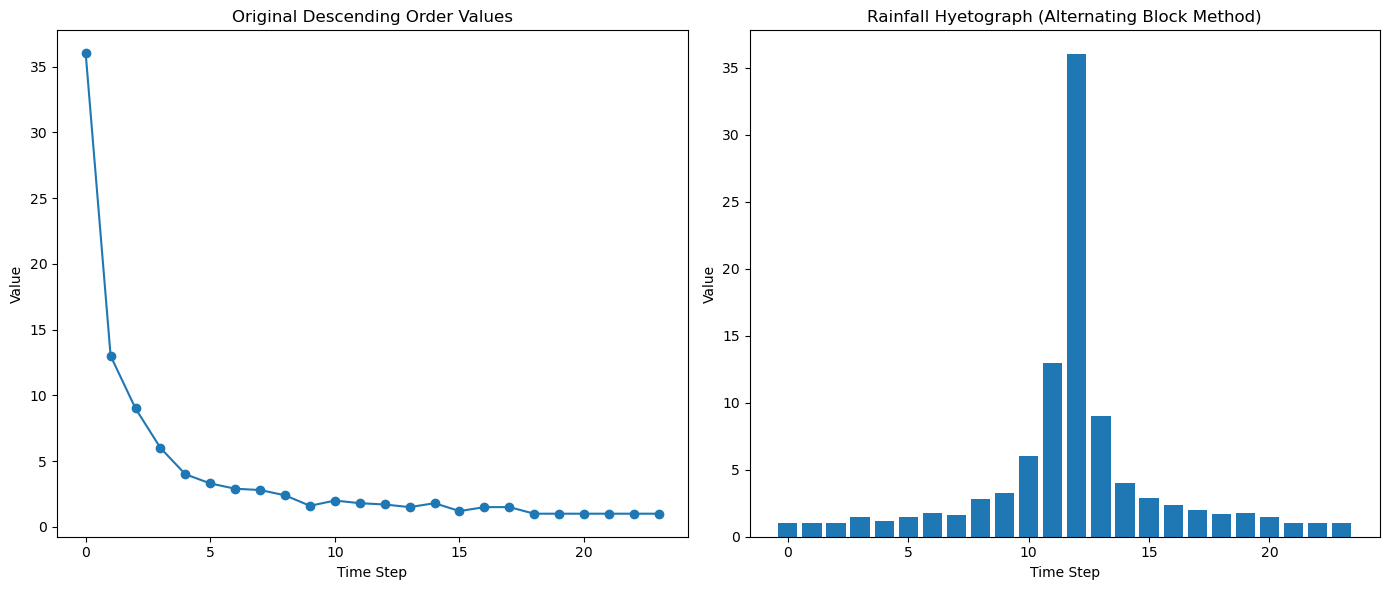

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# returns best fit disrtribution, its parameters 
def fit_best_distribution(data):
    distributions = ['gamma', 'pearson3', 'lognorm', 'gumbel_r', 'norm']
    best_distribution = None
    best_params = None
    best_ks_statistic = np.inf
    
    for distribution in distributions:
        # Fit the distribution to the data
        params = getattr(stats, distribution).fit(data)
        
        # Perform K-S test
        ks_statistic, p_value = stats.kstest(data, distribution, args=params)

        print(ks_statistic, p_value,distribution)
        
        # Update best distribution if current one has better K-S statistic
        if ks_statistic < best_ks_statistic:
            best_distribution = distribution
            best_params = params
            best_ks_statistic = ks_statistic
    
    return best_distribution, best_params, best_ks_statistic

# Calculates return period rainfall based on distribution    
def rainfall(dist,params,p):
    if dist == 'gamma' :
         return stats.gamma.ppf(p,*params)
    elif dist == 'pearson3' :
         return stats.pearson3.ppf(p,*params)
    elif dist == 'lognorm' :
         return stats.lognorm.ppf(p,*params)
    elif dist == 'gumbel_r' :
         return stats.gumbel_r.ppf(p,*params)
    elif dist == 'norm' :
         return stats.norm.ppf(p,*params)

# Generates an array which contains incremetal rainfall values for a particular return period rainfall value
def generate_product_array(excel_file, sub_zone, rainfall_value):
    # Read the Excel file
    df = pd.read_excel(excel_file, sheet_name='Incremental rainfall factor')

    # Validate that the sub zone is in the column headers
    if sub_zone not in df.columns:
        raise ValueError(f"Sub zone '{sub_zone}' not found in the columns: {df.columns.tolist()}")

    # Extract the sub zone values (excluding the first column which is 'Hour')
    sub_zone_values = df[sub_zone].values

    # Calculate the product of the rainfall value and sub zone values
    product_array = rainfall_value * sub_zone_values

    return product_array


# Perfors alternating block method on incremental rainfall values and plots the data
values = product_array

# Step 2: Distribute values using the alternating block method
def alternating_block_method(values):
    n = len(values)
    hyetograph = [0] * n
    
    # Center index
    center = n // 2
    
    # Split the values into alternating blocks
    left, right = center - 1, center + 1
    hyetograph[center] = values[0]
    
    for i in range(1, n):
        if i % 2 != 0:  # Alternate placing on left and right
            hyetograph[left] = values[i]
            left -= 1
        else:
            hyetograph[right] = values[i]
            right += 1
    
    return hyetograph

def main():
    # Load rainfall data from CSV file
    data = pd.read_excel(r'D:\Git\Projects\Git files\Rainfall-analysis\Annual Max Rainfall.xlsx', usecols=[0]).values.flatten()

    # Enter Retun period
    rp =50
    p = 1-(1/rp)


    # Fit best distribution
    best_distribution, best_params, best_ks_statistic = fit_best_distribution(data)

    #return period rainfall
    rf=rainfall(best_distribution, best_params,p)

    # Conversion of return period to incremental rainfall
    excel_file = r'D:\00 Common Data\Rainfall Conversion Factor CWC.xlsx'
    sub_zone = '1b'  # specify the sub zone you're interested in
    rainfall_value = rf  # Reurn period rainfall value
    

    # incremental rainfall values for return period rainfall
    product_array = generate_product_array(excel_file, sub_zone, rainfall_value)

    # Rearrange the values using the alternating block method
    hyetograph = alternating_block_method(values)

    # Print results
    print("Best Fitted Distribution:", best_distribution)
    print("Parameters of Best Fitted Distribution:", best_params)
    print("K-S Test Statistic Value:", best_ks_statistic)
    print("Rainfall of ",rp,"is",rainfall(best_distribution, best_params,p)) 
    print("Incremental rainfall array",product_array)
    print("Rainfall Hyetograph",product_array)
    # Step 3: Plot the original and rearranged lists
    plt.figure(figsize=(14, 6))

    # Original descending values plot
    plt.subplot(1, 2, 1)
    plt.plot(values, marker='o')
    plt.title('Original Descending Order Values')
    plt.xlabel('Time Step')
    plt.ylabel('Value')

    # Rearranged hyetograph plot
    plt.subplot(1, 2, 2)
    plt.bar(range(len(hyetograph)), hyetograph)
    plt.title('Rainfall Hyetograph (Alternating Block Method)')
    plt.xlabel('Time Step')
    plt.ylabel('Value')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    main()
